In [15]:
import pickle
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
path = '/nfs/team283/aa16/KR_NAS/'
os.chdir(path)
sys.path.append(path)
from IPython.display import Image
data_type = 'float32'
os.environ["THEANO_FLAGS"] = 'device=cuda,floatX=' + data_type + ',force_device=True' + ',dnn.enabled=False'
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

Construct AnnData object:

In [16]:
counts = pd.read_table('data/CRcells_14pcw/ns_tic1219_twobatch/az1219b1_TargetCountMatrix.txt')
genes = counts['TargetName']
counts = counts.drop('TargetName',1)
counts = counts.rename(index=genes)
counts = counts.astype('int')
metadata = pd.read_csv('data/CRcells_14pcw/NS_DSP human foetal brain Cajal-Retzius NanoString profiling 2 annotations.csv')
metadata = metadata.rename(index=metadata['Sanger Sample ID'])
print('Metadata, but no counts, number:', len([c for c in metadata.index if c not in np.array(counts.columns)]))
print('Metadata, but no counts, names:',[c for c in metadata.index if c not in np.array(counts.columns)])
print('Metadata and counts, number:', len([c for c in metadata.index if c in np.array(counts.columns)]))
print('Counts, but no metadata, number:', len([c for c in np.array(counts.columns) if c not in metadata.index]))
metadata = metadata.loc[~pd.isna(metadata.index),:]
metadata = metadata.reindex(np.array(counts.columns))
properties = pd.read_table('data/CRcells_14pcw/ns_tic1219_twobatch/az1219b1_SegmentProperties.txt')
properties = properties.rename(index=properties['Sample_ID'])
properties = properties.reindex(np.array(metadata.index))
properties = properties.drop(labels='Sample_ID', axis = 1)
probe_counts = pd.read_table('data/CRcells_14pcw/ns_tic1219_twobatch/az1219b1_BioProbeCountMatrix.txt')
genes = probe_counts['TargetName']
probe_counts = probe_counts.drop(['TargetName', 'ProbeName', 'ProbeDisplayName', 'TargetName', 'HUGOSymbol',
                                 'Accessions', 'GenomeBuild', 'GenomicPosition', 'GlobalOutlier', 'GlobalOutlierReason',
                                 'OutlierFrequency', 'OutlierAOIs', 'Gene'],1)
probe_counts = probe_counts.rename(index=genes)
probe_counts = probe_counts.astype('int')
negprobe_counts = probe_counts.loc[probe_counts.index == 'NegProbe-WTX', ]
negprobe_counts.index = negprobe_counts.index + '-' + [str(x) for x in range(len(negprobe_counts.index))]
adataA = sc.AnnData(X=np.array(counts).T, obs=pd.concat((metadata, properties), axis = 1), var=np.array(counts.index))
adataA.var_names = counts.index
adataA.obsm['negProbes'] = negprobe_counts.T
adataA.obs['GeoLOD2.0_01'] = adataA.obs['NegGeoMean_01'] * adataA.obs['NegGeoSD_01']**2
adataA.obs['DetectedGenes2.0'] = np.sum(np.array([adataA.X[i,:] >= adataA.obs['GeoLOD2.0_01'].iloc[i] for i in range(len(adataA.X[:,1]))]), axis = 1)
adataA.var['SYMBOL'] = adataA.var[0]
adataA.var = adataA.var.drop(0, axis = 1)
adataA.var.index = [str(x) for x in range(len(adataA.var.index))]

Metadata, but no counts, number: 42
Metadata, but no counts, names: ['HCA_F_BRA11360457', 'HCA_F_BRA11360460', 'HCA_F_BRA11360463', 'HCA_F_BRA11360466', 'HCA_F_BRA11360469', 'HCA_F_BRA11360472', 'HCA_F_BRA11360475', 'HCA_F_BRA11360478', 'HCA_F_BRA11360481', 'HCA_F_BRA11360484', 'HCA_F_BRA11360487', 'HCA_F_BRA11360490', 'HCA_F_BRA11360493', 'HCA_F_BRA11360496', 'HCA_F_BRA11360499', 'HCA_F_BRA11360502', 'HCA_F_BRA11360505', 'HCA_F_BRA11360508', 'HCA_F_BRA11360511', 'HCA_F_BRA11360514', 'HCA_F_BRA11360517', 'HCA_F_BRA11360520', 'HCA_F_BRA11360523', 'HCA_F_BRA11360526', 'HCA_F_BRA11360529', 'HCA_F_BRA11360532', 'HCA_F_BRA11360535', 'HCA_F_BRA11360538', 'HCA_F_BRA11360541', 'HCA_F_BRA11360544', 'HCA_F_BRA11360547', 'HCA_F_BRA11360550', 'HCA_F_BRA11360553', 'HCA_F_BRA11360556', 'HCA_F_BRA11360559', 'HCA_F_BRA11360562', 'HCA_F_BRA11360565', 'HCA_F_BRA11360568', 'HCA_F_BRA11360571', 'HCA_F_BRA11360574', 'PhiX', 'No match']
Metadata and counts, number: 81
Counts, but no metadata, number: 0


/nfs/team283/aa16/software/miniconda3/envs/cellpymc/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
adataA.obs['Pool'].astype(str).value_counts()

Residual    41
CRcellsA    40
Name: Pool, dtype: int64

In [18]:
counts = pd.read_table('data/CRcells_14pcw/ns_tic1219_twobatch/az1219b2_TargetCountMatrix.txt')
genes = counts['TargetName']
counts = counts.drop('TargetName',1)
counts = counts.rename(index=genes)
counts = counts.astype('int')
metadata = pd.read_csv('data/CRcells_14pcw/NS_DSP human foetal brain Cajal-Retzius NanoString profiling 2 annotations.csv')
metadata = metadata.rename(index=metadata['Sanger Sample ID'])
print('Metadata, but no counts, number:', len([c for c in metadata.index if c not in np.array(counts.columns)]))
print('Metadata, but no counts, names:',[c for c in metadata.index if c not in np.array(counts.columns)])
print('Metadata and counts, number:', len([c for c in metadata.index if c in np.array(counts.columns)]))
print('Counts, but no metadata, number:', len([c for c in np.array(counts.columns) if c not in metadata.index]))
metadata = metadata.loc[~pd.isna(metadata.index),:]
metadata = metadata.reindex(np.array(counts.columns))
properties = pd.read_table('data/CRcells_14pcw/ns_tic1219_twobatch/az1219b2_SegmentProperties.txt')
properties = properties.rename(index=properties['Sample_ID'])
properties = properties.reindex(np.array(metadata.index))
properties = properties.drop(labels='Sample_ID', axis = 1)
probe_counts = pd.read_table('data/CRcells_14pcw/ns_tic1219_twobatch/az1219b2_BioProbeCountMatrix.txt')
genes = probe_counts['TargetName']
probe_counts = probe_counts.drop(['TargetName', 'ProbeName', 'ProbeDisplayName', 'TargetName', 'HUGOSymbol',
                                 'Accessions', 'GenomeBuild', 'GenomicPosition', 'GlobalOutlier', 'GlobalOutlierReason',
                                 'OutlierFrequency', 'OutlierAOIs', 'Gene'],1)
probe_counts = probe_counts.rename(index=genes)
probe_counts = probe_counts.astype('int')
negprobe_counts = probe_counts.loc[probe_counts.index == 'NegProbe-WTX', ]
negprobe_counts.index = negprobe_counts.index + '-' + [str(x) for x in range(len(negprobe_counts.index))]
adataB = sc.AnnData(X=np.array(counts).T, obs=pd.concat((metadata, properties), axis = 1), var=np.array(counts.index))
adataB.var_names = counts.index
adataB.obsm['negProbes'] = negprobe_counts.T
adataB.obs['GeoLOD2.0_01'] = adataB.obs['NegGeoMean_01'] * adataB.obs['NegGeoSD_01']**2
adataB.obs['DetectedGenes2.0'] = np.sum(np.array([adataB.X[i,:] >= adataB.obs['GeoLOD2.0_01'].iloc[i] for i in range(len(adataB.X[:,1]))]), axis = 1)
adataB.var['SYMBOL'] = adataB.var[0]
adataB.var = adataB.var.drop(0, axis = 1)
adataB.var.index = [str(x) for x in range(len(adataB.var.index))]

Metadata, but no counts, number: 42
Metadata, but no counts, names: ['HCA_F_BRA11360456', 'HCA_F_BRA11360459', 'HCA_F_BRA11360462', 'HCA_F_BRA11360465', 'HCA_F_BRA11360468', 'HCA_F_BRA11360471', 'HCA_F_BRA11360474', 'HCA_F_BRA11360477', 'HCA_F_BRA11360480', 'HCA_F_BRA11360483', 'HCA_F_BRA11360486', 'HCA_F_BRA11360489', 'HCA_F_BRA11360492', 'HCA_F_BRA11360495', 'HCA_F_BRA11360498', 'HCA_F_BRA11360501', 'HCA_F_BRA11360504', 'HCA_F_BRA11360507', 'HCA_F_BRA11360510', 'HCA_F_BRA11360513', 'HCA_F_BRA11360516', 'HCA_F_BRA11360519', 'HCA_F_BRA11360522', 'HCA_F_BRA11360525', 'HCA_F_BRA11360528', 'HCA_F_BRA11360531', 'HCA_F_BRA11360534', 'HCA_F_BRA11360537', 'HCA_F_BRA11360540', 'HCA_F_BRA11360543', 'HCA_F_BRA11360546', 'HCA_F_BRA11360549', 'HCA_F_BRA11360552', 'HCA_F_BRA11360555', 'HCA_F_BRA11360558', 'HCA_F_BRA11360561', 'HCA_F_BRA11360564', 'HCA_F_BRA11360567', 'HCA_F_BRA11360570', 'HCA_F_BRA11360573', 'PhiX', 'No match']
Metadata and counts, number: 81
Counts, but no metadata, number: 0


In [19]:
adata = anndata.AnnData.concatenate(adataA,adataB[adataB.obs['Pool'] == 'CRcellsB',:])

In [20]:
adata[np.array(adata.obs['NegGeoMean_01'] == 1),:].obs['roi']

HCA_F_BRA11360455-0     NaN
HCA_F_BRA11360558-0    11.0
HCA_F_BRA11360566-0    13.0
HCA_F_BRA11360573-0    16.0
HCA_F_BRA11360547-1     7.0
Name: roi, dtype: float64

In [21]:
adata[np.array(adata.obs['NegGeoMean_01'] == 1),:].obs['slide name']

HCA_F_BRA11360455-0    No Template Control
HCA_F_BRA11360558-0            NS_DSP_01FS
HCA_F_BRA11360566-0            NS_DSP_01FS
HCA_F_BRA11360573-0            NS_DSP_01FS
HCA_F_BRA11360547-1            NS_DSP_01FS
Name: slide name, dtype: object

In [22]:
adata

AnnData object with n_obs × n_vars = 121 × 18677
    obs: 'Sample_ID', 'Manifest ID', 'slide name', 'scan name', 'panel', 'roi', 'segment', 'aoi', 'area', 'Type', 'Species', 'Age', 'Background', 'Tissue', 'Slide code', 'Sample slide ID', 'TR', 'Cy5', 'Cy3', 'Pool', 'Collection plate', 'Well', 'PCR plate', 'PCR well', 'Primer plate', 'Primer well', 'I7_Index_ID', 'index', 'I5_Index_ID', 'index2', 'Notes', 'Sanger Sample ID', 'Tag', 'Reads, count', 'Reads, %', 'expected_neg', 'ns_sample_ID', 'RawReads', 'TrimmedReads', 'StitchedReads', 'AlignedReads', 'DeduplicatedReads', 'SequencingSaturation', 'UID', 'NegGeoMean_01', 'NegGeoSD_01', 'GeoLOQ2.5_01', 'NormFactorNeg_01', 'NormFactorQ3', 'NormFactorHK', 'GeoLOD2.0_01', 'DetectedGenes2.0', 'batch'
    var: 'SYMBOL'
    obsm: 'negProbes'

In [23]:
adata = adata[~np.array([adata.obs['roi'].iloc[i] in (11,13,16,7) and adata.obs['slide name'].iloc[i] == 'NS_DSP_01FS'
                        for i in range(len(adata.obs['roi']))]),:]

In [24]:
adata

View of AnnData object with n_obs × n_vars = 109 × 18677
    obs: 'Sample_ID', 'Manifest ID', 'slide name', 'scan name', 'panel', 'roi', 'segment', 'aoi', 'area', 'Type', 'Species', 'Age', 'Background', 'Tissue', 'Slide code', 'Sample slide ID', 'TR', 'Cy5', 'Cy3', 'Pool', 'Collection plate', 'Well', 'PCR plate', 'PCR well', 'Primer plate', 'Primer well', 'I7_Index_ID', 'index', 'I5_Index_ID', 'index2', 'Notes', 'Sanger Sample ID', 'Tag', 'Reads, count', 'Reads, %', 'expected_neg', 'ns_sample_ID', 'RawReads', 'TrimmedReads', 'StitchedReads', 'AlignedReads', 'DeduplicatedReads', 'SequencingSaturation', 'UID', 'NegGeoMean_01', 'NegGeoSD_01', 'GeoLOQ2.5_01', 'NormFactorNeg_01', 'NormFactorQ3', 'NormFactorHK', 'GeoLOD2.0_01', 'DetectedGenes2.0', 'batch'
    var: 'SYMBOL'
    obsm: 'negProbes'

In [25]:
detectedA = np.mean(adata.obs['DetectedGenes2.0'].loc[adata.obs['Pool'] == 'CRcellsA'])
detectedB = np.mean(adata.obs['DetectedGenes2.0'].loc[adata.obs['Pool'] == 'CRcellsB'])
print(detectedA)
print(detectedB)
print(detectedA - detectedB)
print((detectedA - detectedB)/detectedB)

2559.9166666666665
2827.1388888888887
-267.2222222222222
-0.09452037297228252


Text(0, 0.5, 'Detected Genes')

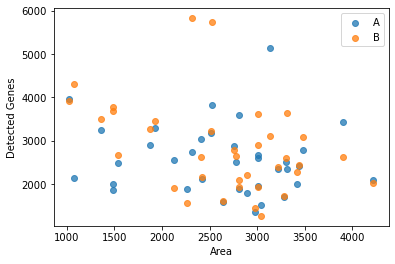

In [26]:
subsetA = adata.obs['Pool'] == 'CRcellsA'
subsetB = adata.obs['Pool'] == 'CRcellsB'
plt.scatter(adata.obs['area'].loc[subsetA], adata.obs['DetectedGenes2.0'].loc[subsetA], label = 'A', alpha = 0.75)
plt.scatter(adata.obs['area'].loc[subsetB], adata.obs['DetectedGenes2.0'].loc[subsetB], label = 'B', alpha = 0.75)
plt.legend()
plt.xlabel('Area')
plt.ylabel('Detected Genes')

No handles with labels found to put in legend.


(0.0, 6000.0)

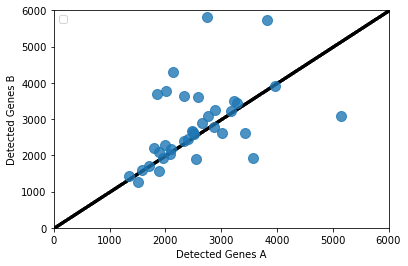

In [27]:
subsetA = adata.obs['Pool'] == 'CRcellsA'
subsetB = adata.obs['Pool'] == 'CRcellsB'
plt.scatter(range(6000), range(6000), c = 'black', s = 1)
plt.scatter(adata.obs['DetectedGenes2.0'].loc[subsetA], adata.obs['DetectedGenes2.0'].loc[subsetB], s = 100, alpha = 0.8)
plt.legend()
plt.xlabel('Detected Genes A')
plt.ylabel('Detected Genes B')
plt.ylim(0,6000)
plt.xlim(0,6000)

Save for later use:

In [34]:
adata.write_h5ad('/nfs/team283/aa16/KR_NAS/data/CR_cells_14pcw_AnnData.h5ad')

/nfs/team283/aa16/software/miniconda3/envs/cellpymc/lib/python3.7/site-packages/anndata/_core/anndata.py:1229: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'Sample_ID' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'slide name' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'scan name' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'panel' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'segment' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'aoi' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Type' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Species' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Age' as categorical
T